# CSCI 5454: Assignment 4

Your Name: __ Xu Han __


Collaborated With:


## Problem 1 (10 points)

Consider the program below:

`def findMinimum(a):
     n = len(a)
     minSoFar =  math.inf
     for i in range(n):
         if (a[i] < minSoFar):
            minSoFar = a[i] # <-- X
     return minSoFar`
     
 If $a$ is a random array of numbers $1, \ldots, n$ such that any of the $n!$ permutations is equally probable. What is the expected number of times the variable `minSoFar` is updated in the for loop (i.e, the statement marked "X" is executed)? Your answer must be a function of $n$, asymptotic notation is fine and you must show the steps/justification that you used to arrive at your answer clearly and concisely.

## Solution (Expected length: 5 lines)

Let $T(n)$ be the expected number of updates. If the last element is not the smallest, $T(n)=T(n-1)$. If the last element is the smallest, $T(n)=T(n-1)+1$. $Pr$(the last element is the smallest)$=\frac{(n-1)!}{n!}=\frac{1}{n}$, so $Pr$(the last element is not the smallest)$=1-\frac{1}{n}=\frac{n-1}{n}$  
So, $T(n)=\frac{n-1}{n}T(n-1)+\frac{1}{n}[T(n-1)+1]=T(n-1)+\frac{1}{n}$,  
We know $T(1)=1$,Therefore, $T(n)=T(n-1)+\frac{1}{n}=T(n-2)+\frac{1}{n-1}+\frac{1}{n}=\cdots=1+\frac{1}{2}+\frac{1}{3}+\cdots+\frac{1}{n}=H_n=\Theta(\ln n)$


## Problem 2A (10 points)

We will now consider a scheme to randomly permute an array of size $n$. You are allowed to generate a single random bit at a time using the `random.getrandbits(1)` function. Write a function `shuffleArray` that will shuffle an input array of $n$ integers so that any permutation is equally probable.

- __Input:__ original list.
- __Return:__ shuffled list.

You __should not__ modify the original array.  You are __forbidden__ to use any random number generator other than `random.getrandbits(1)`.


In [3]:
from random import getrandbits

def shuffleArray(a):
    ## BEGIN SOLUTION
    # follow the method of quick sort, instead of using a pivot to insert array elements, use getrandbits to decide
    if(len(a)<=1):
        return a
    
    left=[]
    right=[]
    for i in range(len(a)):
        if(getrandbits(1)):
            left.append(a[i])
        else:
            right.append(a[i])
    
    a_shuffled = shuffleArray(left)+shuffleArray(right)
    return a_shuffled
    ## END SOLUTION

Chi-Squared value = 25.712
Chi-Squared value = 22.595
Chi-Squared value = 11.046


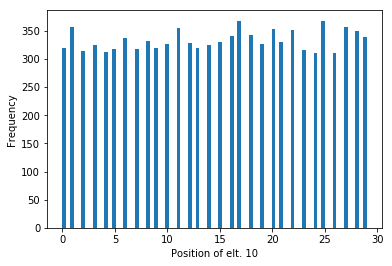

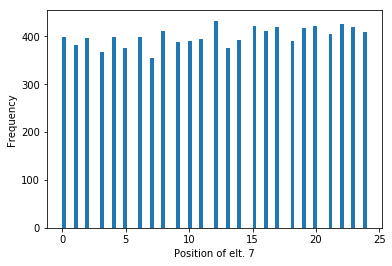

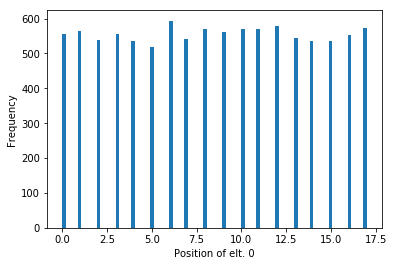

In [5]:
%matplotlib inline
## Begin statistical tests
import matplotlib.pyplot as plt

def placementTest(n, nTrials, elt):
    a = list(range(n))
    where = []
    for i in range(nTrials):
        b = shuffleArray(a)
        # find where element n/2 ended up
        j = b.index(elt)
        where.append(j)
    plt.figure("Position of elt. %d"%(elt))
    plt.hist(where, bins=80)
    plt.xlabel('Position of elt. %d'%(elt))
    plt.ylabel('Frequency')
    # TODO: Implement a xi-squared test 
    # for now let us eyeball the histograms.
    # the histograms must be near uniform. 
    frequency = {}
    for index in where:
        frequency[index] = frequency.get(index, 0) + 1
    exp_frequency = nTrials/n
    chi_squared = 0
    for index in frequency:
        chi_squared += (frequency[index] - exp_frequency)**2/exp_frequency
    print("Chi-Squared value =", round(chi_squared,3))

placementTest(30, 10000, 10)
placementTest(25, 10000, 7)
placementTest(18, 10000, 0)
       
##  End statistical tests

## Problem 2B  (5 Points)

Analyze the expected running time of your algorithm in 2(A) and expected number of random bits used?

## Answer (Expected Size: 5 lines).

__Expected running time__ :

Let $T(n)$ be the expected running time when the array's length is n. On average we have $\frac{n}{2}$ elements randomly assigned to left and rest $\frac{n}{2}$ to right, so we have $2T(\frac{n}{2})$. What's more, the algorithm runs through n elements ($\Theta(n)$). in this case, we have $T(n)=2T(\frac{n}{2})+\Theta(n)$, so, $T(n)=\Theta(nlog(n))$ (master method)


__Expected number of random bits used __:


Let $S(n)$ be the expected number of random bits used when the array's length is n. On average we have $\frac{n}{2}$ elements randomly assigned to left and rest $\frac{n}{2}$ to right, so we have $2S(\frac{n}{2})$ when shuffle left and right. What's more, the algorithm runs through n elements ($\Theta(n)$). in this case, we have $S(n)=2S(\frac{n}{2})+\Theta(n)$, so, $S(n)=\Theta(nlog(n))$ (master method)


## Problem 3  (20 points)

We insert keys from $1, \ldots, n$ in a random order into a binary search tree. Throughout this problem,
node $i$ refers to a node with key $i$. The _priority_ of a node is the rank order in which it is inserted
into the tree with the root having priority $1$ and the very last node to be inserted having priority $n$.

In class, we showed that a node $i$ is the ancestor of a node $j$ if and only if $i$ has the lowest priority amongst all nodes $\{ i, \ldots, j\}$ (or $\{ j, \ldots, i\}$ if $j < i$).

(A) State and prove a condition for node $k$ to be a leaf in the tree.  For the purposes of this problem, a node is a leaf if both its children are NIL. 

(B) What is the probability that node $k$ is a leaf? __Hint:__ Your answer should analyze nodes $1, n$ separately from nodes $2, \ldots, n-1$.

(C) Calculate the expected number of leaf nodes. Your answer should be exact: asymptotic notations or bounds are not acceptable.


### Answer (Expected Size: 15 lines)

(A) 

__Statement:__ For the node k to a leaf in the tree, a condition is the priority of $k$ is higher than both node $k+1$ and $k-1$ 


__Proof:__  Since a node $i$ is the ancestor of a node $j$ if and only if $i$ has the lowest priority amongst all nodes $\{ i, \ldots, j\}$ (or $\{ j, \ldots, i\}$ if $j < i$),  
then we know if $i$'s priority is not the lowest amongst all nodes $\{ i, \ldots, j\}$ (or $\{ j, \ldots, i\}$ if $j < i$), then $i$ is not $j$'s ancsetor.  
* when the priority of $k$ is higher than both node $k+1$ and $k-1$, for any of the node $x$(including $x=k-1$ or $x=k+1$), $k$'s priority is not the lowest amongst nodes $\{ x, \ldots,k-1,k\}$(or $\{ k,k+1 \ldots, x\}$ if $k < x$), so $k$ is not an ancestor for any other nodes, so we prove node $k$ is a leaf  
* when node $k$ is a leaf, it has no children, which means node $k-1.k+1$'s priority must lower than $k$'s.  


(B)

Based on (A):

When $k=1$, $Pr(k$ is a leaf$)=Pr(p_1>p_2)=\frac{1}{2}$  

When $k=n$, $Pr(k$ is a leaf$)=Pr(p_n>p_{n-1})=\frac{1}{2}$ 

When $1<k<n$, $Pr(k$ is a leaf$)=Pr(p_k>p_{k+1}, p_k>p_{k-1})=\frac{2!}{3!}=\frac{1}{3}$  

 


(C)

Based on (B), we have $E$(number of leaf nodes)=$\frac{1}{3}\times(n-2)+\frac{1}{2}\times2=\frac{n+1}{3}$

## Problem 4 (5 points)

We wish to rapidly find the $k^{th}$ smallest element in a skip list. Describe what extra information you would store in each node of the list and how you would find the $k^{th}$ smallest element in a skip list using this information.  What is the running time of your search in the worst case.


## Answer (Expected Size: 5 lines)

Suppose our skip list is ascending.

__Extra information:__ the number of index intervals between adjacent elements in the current level. The interval should include the current element. 

__How to find $k^{th}$ smallest element:__

Denote the interval as $i_n$ (the subscripted $n$ represents the index of the current element with this interval).  

We start from the highest level's first node. 

Step 1: If $k<=i_n$, we will go to the lower level and make comparison with new $i_n$; else if $k>i_n$, make $k=k-i_n$ and go to the next node. 

Step 2: If k==1, we find the node; else go back to the first step, make comparison with the current node's interval.

Worst case is when k=1, which means we want to find the minimum of the array, the running time will be O($\log n$) since we need to jump O($\log n$) levels.